# Predicting cab booking cancellation
## Capstone Project One : Springboard Data Science career track
### Notebook by Debisree Ray


## Introduction:

### 1. The Problem:

The business problem addressed here is to improve the customer service for Bangalore (India) based cab company called YourCabs. The problem is that a certain percentage of booking gets canceled by the company due to the unavailability of a car, and the cancellations occur at a time when the trip is about to start. Therefore it causes passengers inconvenience and a bad reputation for the company. So, the challenge is to build a predictive model, which would classify the upcoming bookings as, if they would eventually get cancelled due to car unavailability, or not. So this is a classification problem.


### 2. The Data: 

The Kaggle hosts the original problem and the dataset in their website as one of their competitions. Here, I downloaded the data from the Kaggle website. Following are the data fields in the dataset, which we are going to read in the Pandas data frame.


* id - booking ID<br />
* user_id - the ID of the customer (based on mobile number)<br />
* vehicle_model_id - vehicle model type.<br />
* package_id - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)<br />
* travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).<br />
* from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages <br />
* to_area_id - unique identifier of area. Applicable only for point-to-point travel <br />
* from_city_id - unique identifier of city <br />
* to_city_id - unique identifier of city (only for intercity) <br />
* from_date - time stamp of requested trip start <br />
* to_date - time stamp of trip end <br />
* online_booking - if booking was done on desktop website <br />
* mobile_site_booking - if booking was done on mobile website <br />
* booking_created - time stamp of booking <br />
* from_lat - latitude of from area <br />
* from_long - longitude of from area <br />
* to_lat - latitude of to area <br />
* to_long - longitude of to area <br />
* Car_Cancellation (available only in training data) - whether the booking was cancelled (1) or not (0) due to unavailability of a car. <br />
* Cost_of_error (available only in training data) - the cost incurred if the booking is misclassified. The cost of misclassifying an uncancelled booking as a cancelled booking (cost=1 unit). The cost associated with misclassifying a cancelled booking as uncancelled, This cost is a function of how close the cancellation occurs relative to the trip start time. The closer the trip, the higher the cost. Cancellations occurring less than 15 minutes prior to the trip start incur a fixed penalty of 100 units. <br />



### 3. The questions of interest:

This data analysis and story-telling report is organized around the following questions of interest:

* How many unique users are out there? Are there any returning customers? Did they (returning customers) got their rides canceled?
* What are the different package IDs out there? Is there any relationship with the cancellations?
* What are the different travel types, vehicle IDs and mode of bookings (mobile/website/phone)? How are they related with the cancellations?
* Is there any connection between the drop-off location/city/area ID/latitude-longitude info and cancellations? What about the same with the pick-up locations/city/area IDs
* In which areas/neighborhoods, the cab service is the most popular?
* what is the busiest hour in a day? Does that have any connection with the cancellation?
* Which day of the week is the most popular in the cab users? Is there any connection between the day of the week with the cancellations?


### 4. Executive summary:

* The dataset contains 43431 entries and 20 columns which includes 18 features (all categorical).

* Only ~7% (3132, in total 43,431) of the total bookings has been canceled.

* Total 22267 user IDs have been recorded. The no. of one-time users (non returning) are: 15935 and that of the returning customers are: 6332. user with the user_id '29648' is the most frequent user, with frequency 471. He/she got the maximum cancellations too, 55 tmes.

* Package ID and travel type IDs are the different ride plans, which seems do not have much connection with the cancellations.

* 27 different types of vehicles have been listed. The most popular one is the vehicle with the vehicle ID no '12' (used 31859 times). The same vehicle ID ('12' )got the maximum number of cancellations (2668 times) as well.

* Total 1878 bookings have been done from the mobile websites, 15270 bookings from the desktop websites, so, 26283 bookings have been done differently. Maximum no. of cancellations correspond to the bookings done from the desktop websites.

* 598 unique origin and 568 destination area informations have been listed. 559 of them are common to both. The most popular origin area is the area with area_id no. '393', which is eventually the most popular destination area as well. There are certain pick-up and drop-off areas for which more than 50% of the bookings were canceled. And some routes (from certain pick-up to certain drop-off areas), for which more than 90% of bookings were canceled.

* Only 3 origin cities have been recorded. The most popular origin city is the city with the ID no: '15'. Where as, 116 unique destination cities are there. The most popular destination city is the city with the ID no: '32' (475 rides have their destinations to this city.)

* Booking timestamps show the date-time information, about when the booking has done. Maximum no. of bookings made at a given timestamp is, 18. The corresponding date-time is: 2013-10-31 10:30:00. Splitting the timestamp information in days/months and times reveal that, maximum bookings were done on the Fridays. And in the month of August.


* Record of the timestamp of the actual rides is one of the most important features in the dataset, which might show some connection with the cancellation. Maximum no. of trips started at a given timestamp is, 20 and the corresponding date-time is: 2013-10-12 06:00:00 and 2013-07-04 22:15:00.

* Extracted the ride frequencies over the days of the week. maximum no. of (6990) rides correspond to Saturday's, followed by the 'friday's. Where as the maximum cancellations(578) correspond to the 'friday's, followed by the 'sunday's.

### 5. Import the necessary libraries and the data:



To start the EDA, here every different features have been studied and visually displayed against the 'cancellations', so as to infer any relationship between them. 

To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe.

In [137]:
#os.getcwd()
#os.chdir ('Springboard_Debisree/predicting-cab-booking-cancellations/')

import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [138]:
df = pd.read_csv('Kaggle_YourCabs_training.csv')
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-nu

In [140]:
#convert from_date column, to_date column and booking_created column to date-time
#Note: when we try to convert NaN to date-time, it gets converted to NaT(Not a timestamp)


df['from_date'] = pd.to_datetime(df['from_date'])
df['to_date'] = pd.to_datetime(df['to_date'])
df['booking_created'] = pd.to_datetime(df['booking_created'])
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0


In [141]:
#summary statistics of the dataframe:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114,8.000509
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680,25.350698
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000,0.150000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000,1.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000,1.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000,1.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000,100.000000


So, we see that many of the columns (eg. 'package_id', 'to_area_id' etc.) have missing values.


In [142]:
## Let's split the dataframe in another group (for which the car_cancellation =1):

df1 = df[df['Car_Cancellation'] > 0]
#df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 21 to 43422
Data columns (total 20 columns):
id                     3132 non-null int64
user_id                3132 non-null int64
vehicle_model_id       3132 non-null int64
package_id             336 non-null float64
travel_type_id         3132 non-null int64
from_area_id           3130 non-null float64
to_area_id             2775 non-null float64
from_city_id           1691 non-null float64
to_city_id             21 non-null float64
from_date              3132 non-null datetime64[ns]
to_date                2135 non-null datetime64[ns]
online_booking         3132 non-null int64
mobile_site_booking    3132 non-null int64
booking_created        3132 non-null datetime64[ns]
from_lat               3130 non-null float64
from_long              3130 non-null float64
to_lat                 2775 non-null float64
to_long                2775 non-null float64
Car_Cancellation       3132 non-null int64
Cost_of_error          3132 non-

So, df1 is another dataframe for the canceled ('Car_cancellation' = 1) bookings. Total no of entries are 3132.


In [326]:
#Booking time:

time=df.booking_created.value_counts()
t=df.booking_created
t_can=df1.booking_created
time_can= df1.booking_created.value_counts()
#print(time_can)

max=time.values.max()
min=time.values.min()



#t=time.loc[time.values == max]

print('Maximum booking created at a given timestamp:'+ str(max))
print('And the corresponding date-time is: 2013-10-31 10:30:00')
print('Minimum booking created at a given timestamp:'+str(min))

import datetime

df['booking_dayofweek'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.dayofweek
df['booking_date'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.day
df['booking_month'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.month
df['booking_time'] = pd.to_datetime(df['booking_created'],errors ='coerce').dt.time

df1['booking_dayofweek_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.dayofweek
df1['booking_date_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.day
df1['booking_month_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.month
df1['booking_time_can'] = pd.to_datetime(df['booking_created'],errors ='coerce').dt.time


booking_dayofweek=df.booking_dayofweek.value_counts()
booking_date=df.booking_date.value_counts()
booking_m=df.booking_month.value_counts()
booking_t=df.booking_time.value_counts()

booking_dayofweek_can=df1.booking_dayofweek_can.value_counts()
booking_date_can=df1.booking_date_can.value_counts()
booking_m_can=df1.booking_month_can.value_counts()
booking_t_can=df1.booking_time_can.value_counts()




Maximum booking created at a given timestamp:18
And the corresponding date-time is: 2013-10-31 10:30:00
Minimum booking created at a given timestamp:1


In [157]:
date=df.from_date.value_counts()
date_can=df1.from_date.value_counts()
#print(date_can)
d=df.from_date
d_can=df1.from_date
max_d=date.values.max()
min_d=date.values.min()

In [158]:
d_can.describe()

count                    3132
unique                   2377
top       2013-05-12 07:30:00
freq                       11
first     2013-01-01 18:30:00
last      2013-11-30 18:30:00
Name: from_date, dtype: object

In [327]:
#Splitting the trip starting time info into two seperate columns, date and time:
#To see if that has any connection with the cancellations:

#pd.__version__
import datetime

df['dayofweek'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.dayofweek
df['date'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.day
df['month'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.month
df['time'] = pd.to_datetime(df['from_date'],errors ='coerce').dt.time

df1['dayofweek_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.dayofweek
df1['date_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.day
df1['month_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.month
df1['time_can'] = pd.to_datetime(df['from_date'],errors ='coerce').dt.time


weekday=df.dayofweek.value_counts()
date=df.date.value_counts()
month=df.month.value_counts()
t=df.time.value_counts()

weekday_can=df1.dayofweek_can.value_counts()
date_can=df1.date_can.value_counts()
month_can=df1.month_can.value_counts()
t_can=df1.time_can.value_counts()
#print(month_can)



In [329]:
#Inspect if the time difference between the time of 
#booking and the time of trip strat has any impact on the cancellation:


import datetime as dt
end= df['from_date']
start=df['booking_created']
diff = (end - start) 
df['time_difference']= diff/np.timedelta64(1,'h')
#print(difference)

end_can= df1['from_date']
start_can=df1['booking_created']
diff_can = (end_can - start_can) 
df1['time_difference_can']= diff_can/np.timedelta64(1,'h')
#print(difference)


td=df.time_difference.value_counts()

td_can=df1.time_difference_can.value_counts()




### Some problem in the dataset:

We can see that in 42 entries of the dataset, the time difference (which is the difference in the datetime entries of ride booking and the actual trip start) is negative! This is unphysical, where you cannot book the ride, which has already initiated. Surprisingly, 41 of them are successful (not canceled.) 

We dropped these entries.



In [328]:
# Numerical values of the time difference:

#average time difference:
m0=np.mean(df['time_difference'])
print(m0)

#print('The average time difference (hrs.) between the booking time and that of the trip start: ' +str(m1))

#average time difference for the canceled bookings:
#m2=np.mean(df1['time_difference_can'])
#print('The average time difference (hrs.) between the booking time and that of the trip start for canceled bookings : ' +str(m2))
#df.head()

df_n = df[df['time_difference'] < 0]
#df_n['Car_Cancellation']
#print(df_n['booking_created'])
#print(df_n['from_date'])
#print(len(df_n))


df_new= df.drop(df[df['time_difference'] < 0].index)
#df_new.head()
#len(df_new)



33.94207478529163


In [174]:
df_new.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'Cost_of_error', 'booking_dayofweek', 'booking_date', 'booking_month',
       'booking_time', 'dayofweek', 'date', 'month', 'time',
       'time_difference'],
      dtype='object')

## 6. Data preperation and feature selection:

Following features will be considered for analysis:

* vehicle_model_id
* package_id
* travel_type_id
* from_area_id
* to_area_id
* from_city_id
* to_city_id
* online_booking
* mobile_site_booking
* booking_date
* booking_month
* dayofweek
* date
* month
* time_difference

In [216]:
features_cols = ['vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id','from_city_id', 'to_city_id',
'online_booking', 'mobile_site_booking','booking_dayofweek', 'booking_date', 'booking_month', 'dayofweek', 'date', 'month',
                 'time_difference']

features = df_new[features_cols]
y = df_new.Car_Cancellation

In [225]:
# Add a new level ( -9999 ) for missing values:

features.from_area_id.fillna(-9999, inplace=True)
features.to_area_id.fillna(-9999, inplace=True)
features.package_id.fillna(-9999,inplace=True)
features.from_city_id.fillna(-9999, inplace=True)
features.to_city_id.fillna(-9999,inplace=True)

In [238]:
#features
X= features

In [255]:
#Import ML models:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

### 7.The Machine Learning model- Logistic Regression:

Classification using the Logistic Regression

In [307]:
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import validation_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range

#plt.figure(figsize=(10, 10))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred)
    j += 1
    
table   

,C_parameter,Accuracy
0,0.001,0.928478
1,0.010,0.928478
2,0.100,0.928478
3,1.000,0.928478
4,10.000,0.928478
5,100.000,0.928478


In [306]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
print(Logreg.score(X_test,y_test))

0.9284781439655835


In [314]:
cv_scores= cross_val_score(logreg,X_test,y_test,cv=5,scoring='roc_auc')
print(cv_scores)
print ('Mean cross validation score: ' +str(cv_scores.mean()))
print ('Standard deviation in cv scores: ' +str(cv_scores.std()))

[0.75138113 0.71323644 0.70564905 0.69871341 0.65965095]
Mean cross validation score: 0.705726197293205
Standard deviation in cv scores: 0.02936967882933604


### Understanding which C parameters are the best to use:

A valid question to raise is, which C values must we use?
There is a way to check which C values are best. The idea is to understand how each C value affects the accuracy of the training set and the testing set. Our goal is always to create a model that can generalise to the unseen data. The way to do this is to plot validation curves.


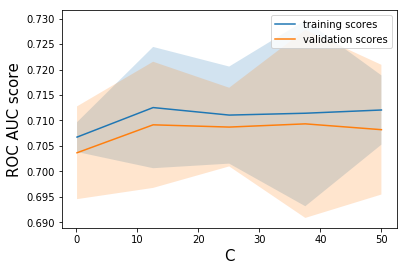

In [321]:
from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve

def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(C, val_train, label='training scores')
plot_with_err(C, val_test, label='validation scores')
plt.xlabel('C',fontsize=15); 
plt.ylabel('ROC AUC score',fontsize=15)
plt.legend();


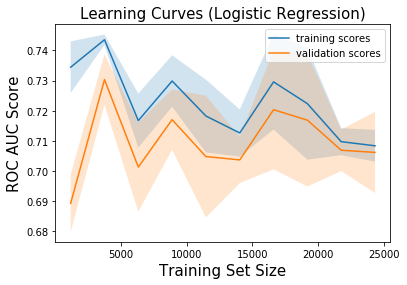

In [325]:
C = np.linspace(0.1, 50, 5)
val_train, val_test = validation_curve(LogisticRegression(penalty='l2'),
                                       X_train, y_train, 'C', C, cv=5, scoring='roc_auc')

def plot_learning_curve(C=13):
    train_sizes = np.linspace(0.05, 1, 10)
    N_train, val_train, val_test = learning_curve(LogisticRegression(C=C, penalty='l2'),
                                                  X_train, y_train, train_sizes, cv=5,
                                                  scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size', fontsize=15);
    plt.title ('Learning Curves (Logistic Regression)',fontsize=15);
    plt.ylabel('ROC AUC Score', fontsize=15);
    plt.legend()

plot_learning_curve()    